In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl



In [11]:
df = pd.read_excel('Data1Hour.xlsx')

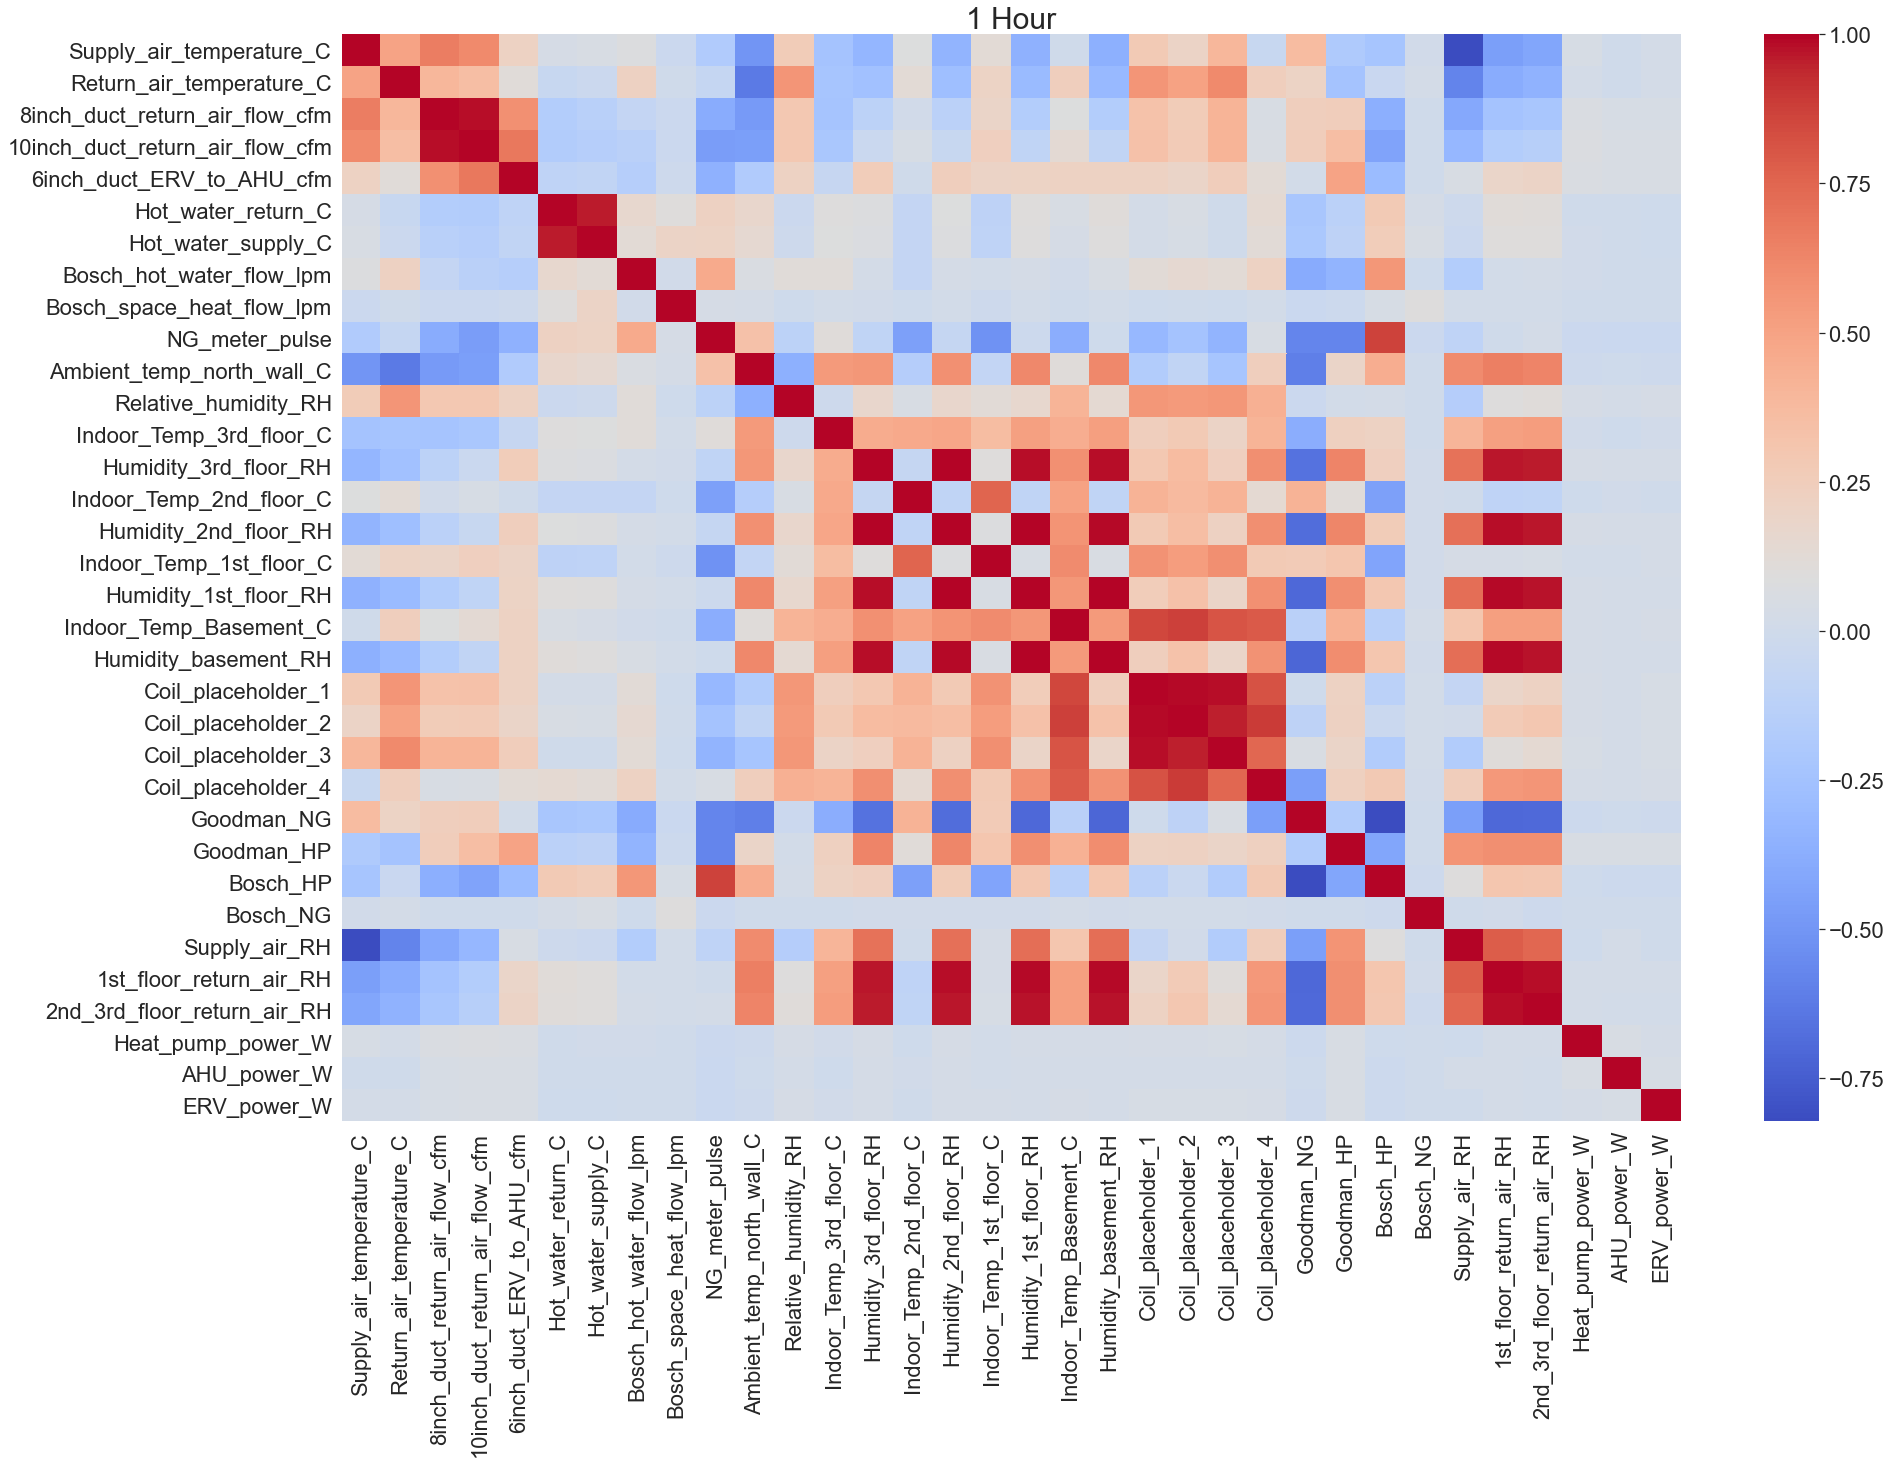

In [14]:
heat = pd.DataFrame(data = df)
c = heat.corr()

plt.figure(figsize = (30,20))
sns.heatmap(c, cmap="coolwarm")
plt.title("1 Hour", fontsize = 30)
plt.show()

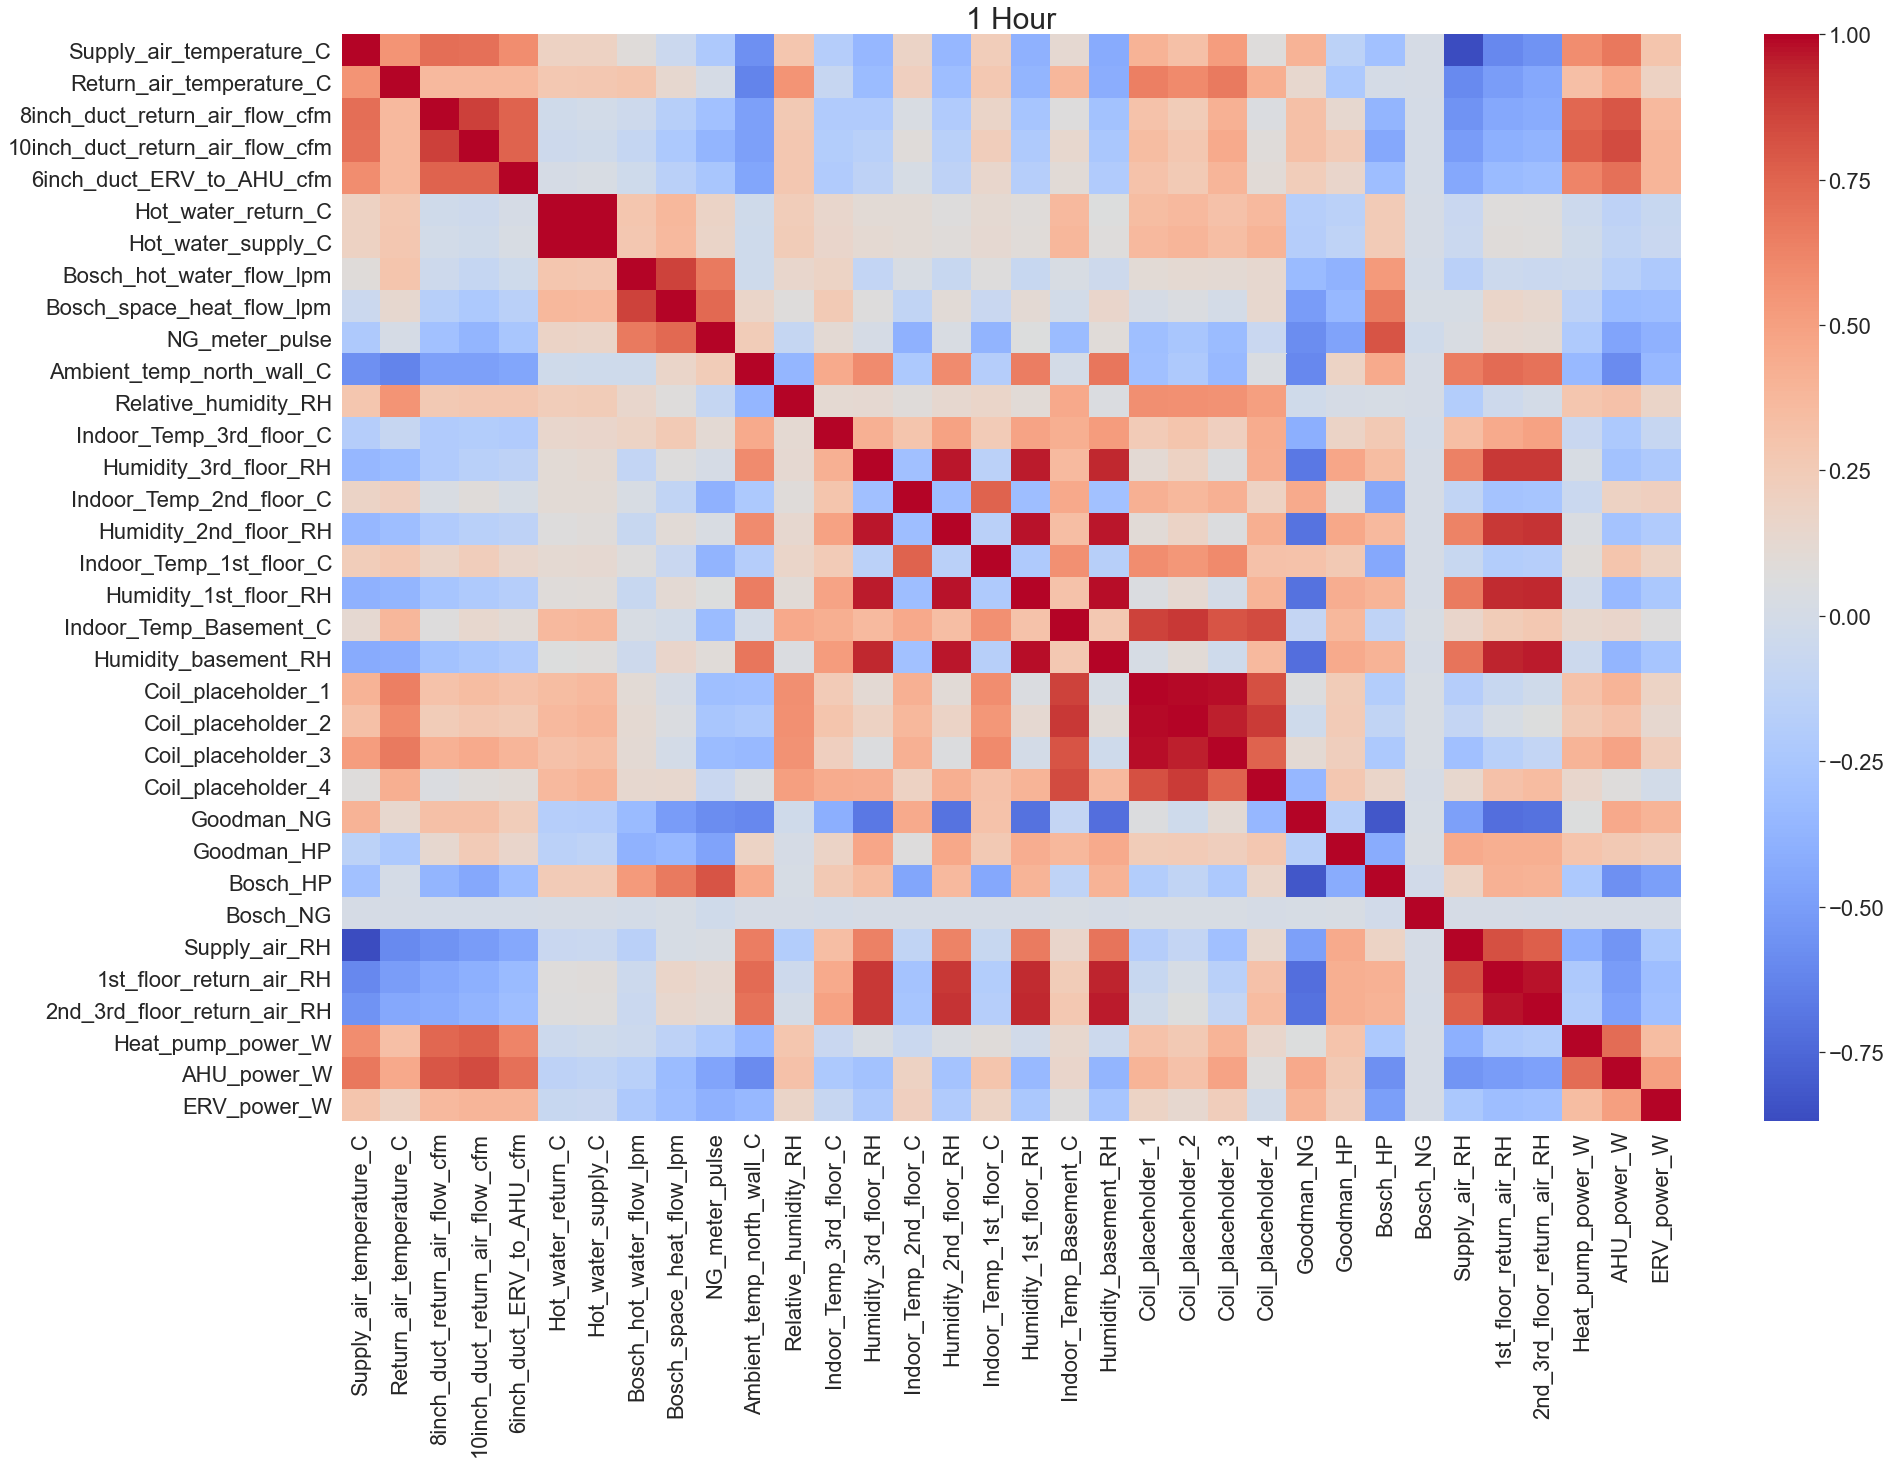

In [13]:
heat = pd.DataFrame(data = df)
c = heat.corr('spearman')

plt.figure(figsize = (30,20))
sns.heatmap(c, cmap="coolwarm")
sns.set(font_scale = 2)
plt.title("1 Hour", fontsize = 30)
plt.show()

In [ ]:
df1 = pd.read_excel('Data2Minsr.xlsx')

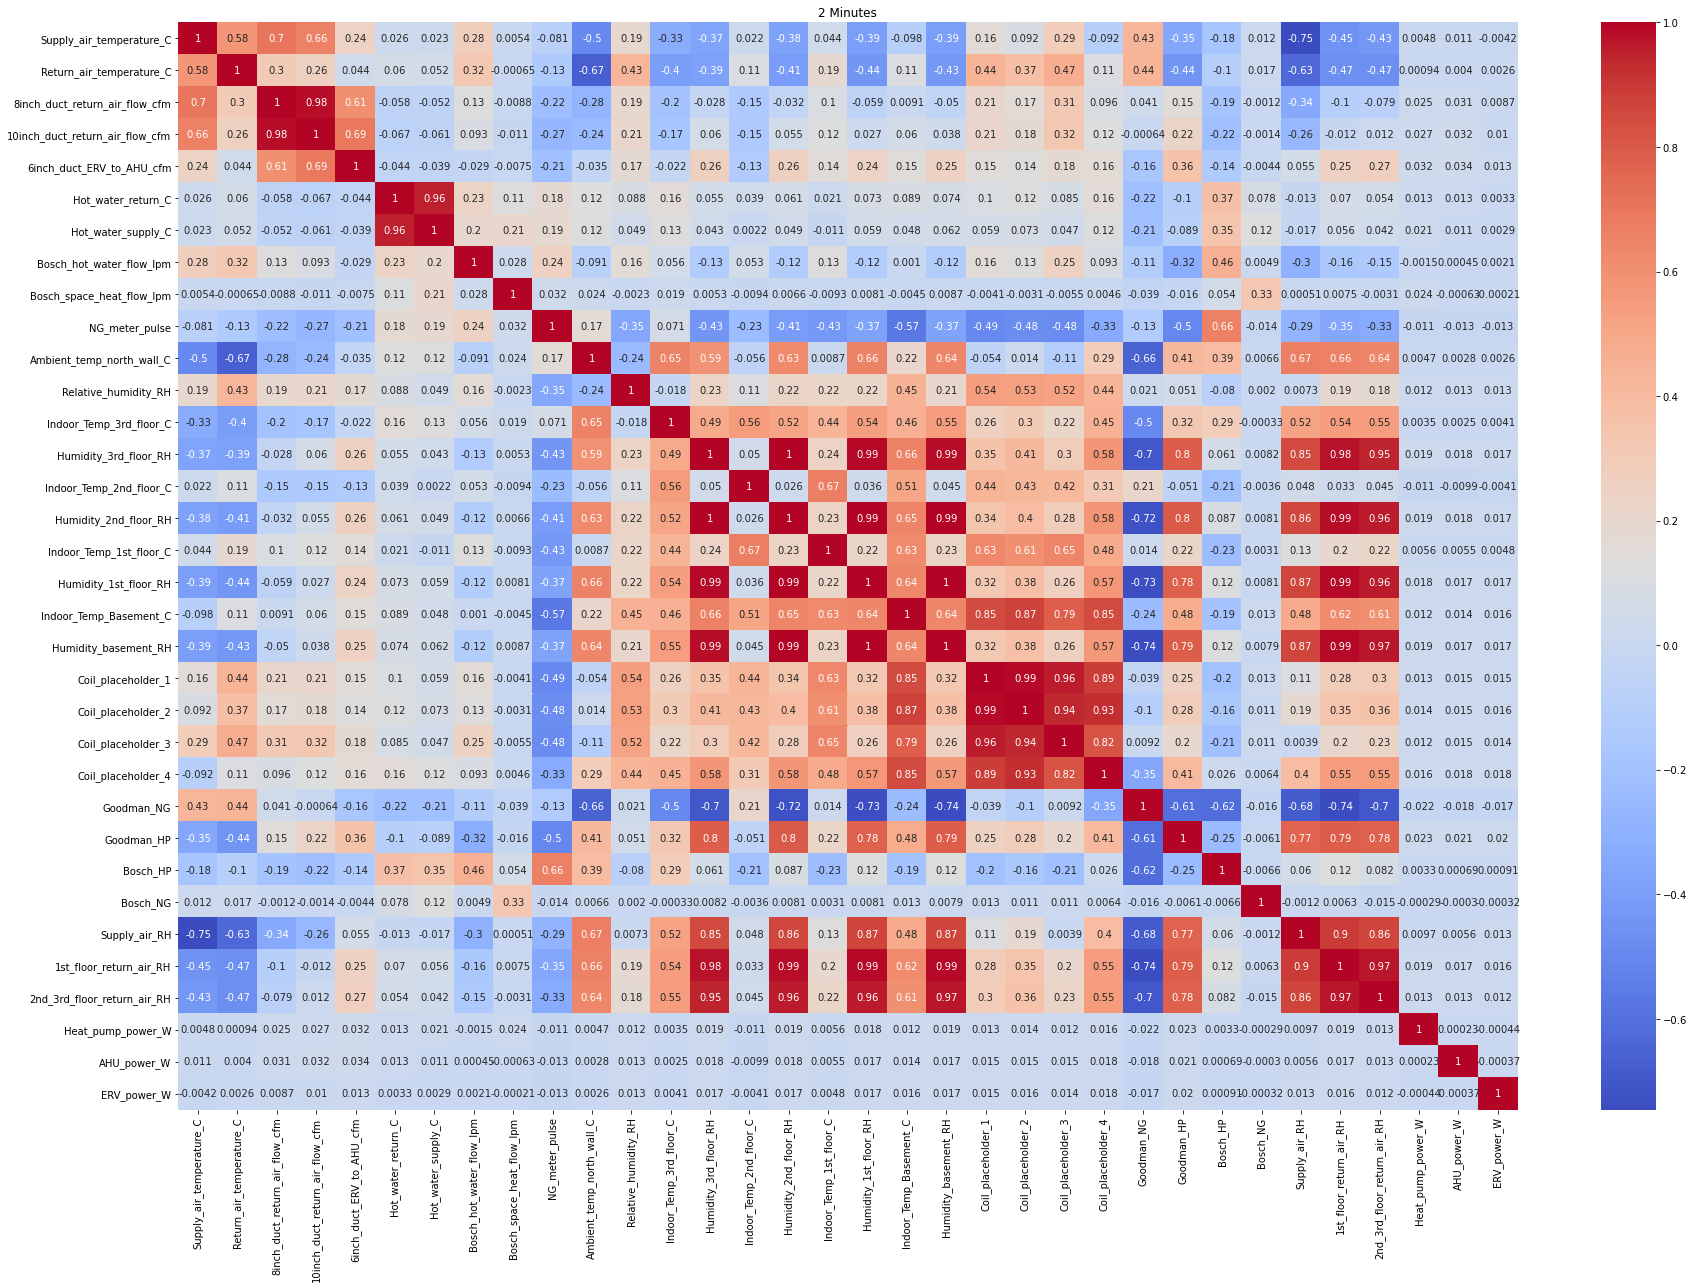

In [16]:
heat = pd.DataFrame(data = df1)
c = heat.corr()

plt.figure(figsize = (30,20))
sns.heatmap(c, cmap="coolwarm", annot=True)
plt.title("2 Minutes")
plt.show()

In [22]:
df2 = pd.read_excel('Cumulative_meter_NG.xlsx')

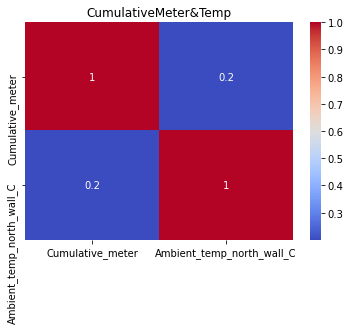

In [23]:
heat = pd.DataFrame(data = df2)
c = heat.corr()

sns.heatmap(c, cmap="coolwarm", annot=True)
plt.title("CumulativeMeter&Temp")
plt.show()

In [2]:
df_ecobee = pd.read_excel('Clean_Data.xlsx')

In [3]:
df_ecobee['DateTime'] = pd.to_datetime(df_ecobee['DateTime'])
df_ecobee['Month'] = pd.DatetimeIndex(df_ecobee['DateTime']).month
df_ecobee['DayOfWeek'] = pd.DatetimeIndex(df_ecobee['DateTime']).dayofweek
df_ecobee['HourofDay'] = pd.DatetimeIndex(df_ecobee['DateTime']).hour
df_ecobee['Day'] = pd.DatetimeIndex(df_ecobee['DateTime']).day

In [8]:
null_list = df_ecobee[df_ecobee['System Setting'].isnull()].index.tolist()
df_new = df_ecobee.drop(null_list)
df_new["30min_lagged_outdoortemp"] = df_new['Outdoor Temp (C)'].shift(6)
df_new['30min_lagged_outdoor_RH']= df_new['Current Humidity (%RH)'].shift(6)
df_new['30min_lagged_windspeed']= df_new['Fan (sec)'].shift(6)
df_new['30min_lagged_current_temp']= df_new['Current Temp (C)'].shift(6)

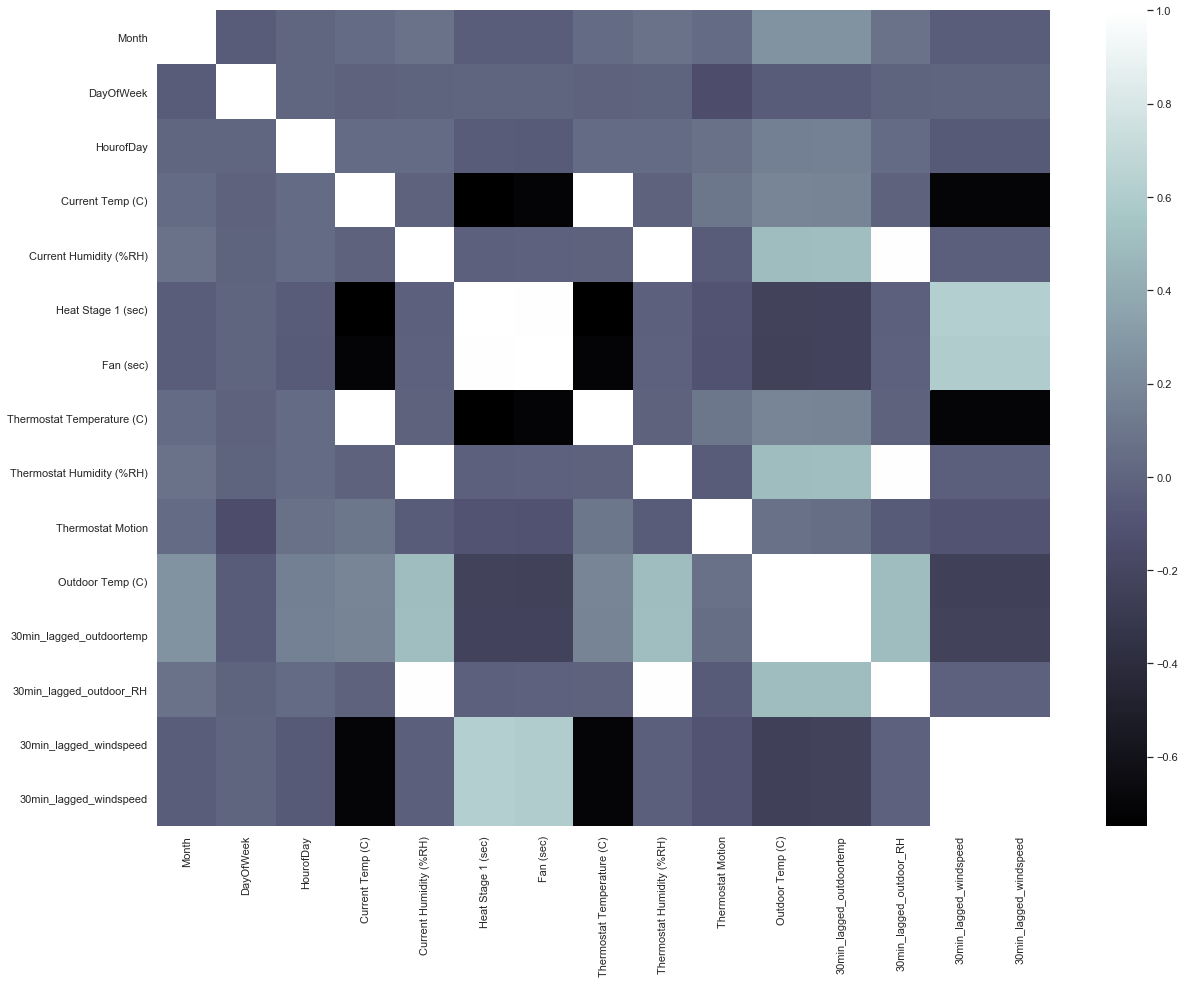

In [10]:
plt.figure(figsize = (20,15))
data = df_new[['Month','DayOfWeek', 'HourofDay','Current Temp (C)', 'Current Humidity (%RH)', 'Heat Stage 1 (sec)', 'Fan (sec)', 'Thermostat Temperature (C)', 'Thermostat Humidity (%RH)', 'Thermostat Motion','Outdoor Temp (C)',"30min_lagged_outdoortemp",'30min_lagged_outdoor_RH','30min_lagged_windspeed','30min_lagged_windspeed']]
corr = data.corr('spearman')
sns.heatmap(corr, cmap = 'bone')
sns.set(font_scale = 1)
plt.savefig("a.png")
plt.show()